## Deling på null

Som i de fleste programmeringsspråk gi Python feilmelding hvis vi prøver å dele på 0. Det betyr at programmet som kjører avbryter uten å fullføre.  

I små programmer som gjør enkle utregninger er det uheldig, men får gjerne ikke store konsekvenser. Vi kan som oftest omgå problemet ganske enkelt. Men det er andre situasjoner hvor vi er avhengig av at programmet fullfører.  

- Hvis vi regner ut funksjonsverdier vil vi ikke få noe resultat der det oppstår deleing på null.  
- I litt større beregninger er verdier som inngår i en beregning ofte selv regnet ut tidligere i programmet. Da kan det være vanskelig å forutse hvor og når det kan oppstå deling på null.  

I begge disse tilfellene må vi håndtere problemet når det oppstår. Alternativt kan vi gjøre tiltak for å unngå det, men det kan være vanskelig å forutse. 

Vi skal nå se på et par måter vi kan håndtere det på. Til dette bruker vi et enkelt, men likevel litt artig eksempel.  

Vi skal plotte funksjonen: $ \large f(x)=cos\left ( \frac{1}{x} \right ) $  

Vi ser med en gang at vi får deling på 0 for x = 0. Det vi videre kan si om denne funksjonen er at den er kontinuerlig, definert for alle x og er symetrisk om x-aksen. Når x blir stor (positiv eller negativ) nærmer y-verdien seg 1. Når x nærmer seg 0 begynner funksjonsverdien å svinge, raskere og raskere mellom -1 og 1. Vi blir derfor bare å se på et lite område rundt x-aksen. I første omgang fra -1 til 1. Vi får igjen se hvor mye antall punkter som plottes har å si for resultatet.  

/tmp/ipykernel_17925/1674817832.py:5: RuntimeWarning: divide by zero encountered in divide
  y = np.cos(1/x)
/tmp/ipykernel_17925/1674817832.py:5: RuntimeWarning: invalid value encountered in cos
  y = np.cos(1/x)


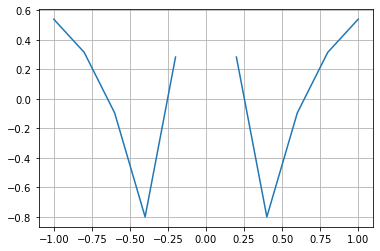

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 11)
y = np.cos(1/x)
plt.plot (x, y)
plt.grid()
plt.show()

Vi fikk feilmelding og plottet viser ikke en kontinuerlig funksjon. Dette skyldes deling på null. Det ble heller ikke noe økende svigning når vi nermet oss null. Det skyldes bare få punkter.

De to måtene vi skal håndtere deling på null er:  
- Bruke avrundingsfeil
- Regne ut funksjonsverdier enkeltvis og håndtere deling på null i programmet.

#### Bruke avrundingsfeil

Dette er egentlig juks og en omgåelse av problemet, men det kan fungere bra i en del tilfeller. Det vi kan gjøre er å bruke en funksjon (eller to) på x som egentlig skal gi x til svar, men som gir en liten avrundingsfeil.  

Blant de trigonometriske funksjoner har vi også inverse funksjoner som regner «andre veien». Hvis vi tar cosinus av en vinkel og så arcus-cosinus (arccos) av den verdien skal vi få vinkelen igjen. Python gir riktig verdi av cos(0) = 1 og også for arccos(1) = 0. Men om vi gjør det i motsatt: Tar arccos av x og så cos av den vinkelen får vi en avrundingsfeil. For de fleste formål er den neglisjerbar. For 0 får vi et resutat som er så godt som 0, men ikke helt 0. Det gjør at vi kan bruke dette triset for å unngå deling på null. For å være sikke på å få avrundings  

Vi setter altså cos( arccos(x) ) i stedet for x. slik at hele funksjonen blir: $ \large\ f(x)=cos\left ( \frac{1}{cos(arccosx))} \right ) $  

For å plotte denne får vi følgende kode:

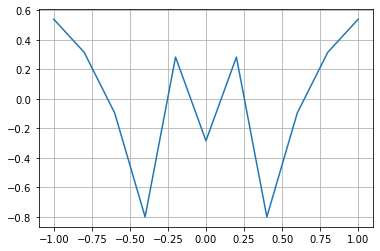

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 11)
y = np.cos(1/np.cos(np.arccos(x)))
plt.plot (x, y)
plt.grid()
plt.show()

Vi unngikk deling på null og fikk en kontinuerlig graf. Ved å leggge inn litt ekstra kan vi blant annet justere plottområdet og antall punkter.

Maksimal x-verdi (mellom 0 og 1 er passelig):  .5
Antall punkter i plottet:  12


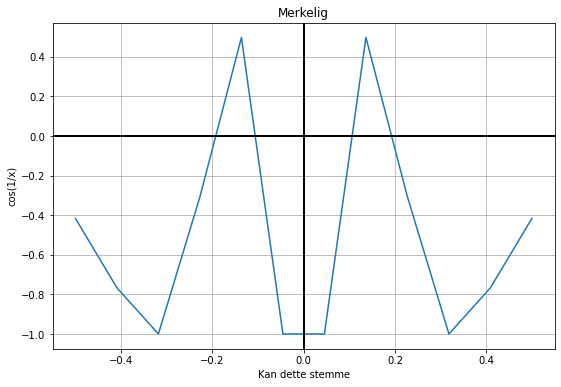

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6] # Dette er for å få en større figur

maksx = float(input('Maksimal x-verdi (mellom 0 og 1 er passelig): '))
plottpunkter = int(input('Antall punkter i plottet: '))

x = np.linspace(-maksx, maksx, plottpunkter)
y = np.cos(1/np.cos(np.arccos(x)))
plt.plot (x, y)
plt.grid()
plt.axhline(c='k', lw=2) # uthever x-aksen
plt.axvline(c='k', lw=2) # uthever y-aksen
plt.title('Merkelig')
plt.xlabel('Kan dette stemme')
plt.ylabel('cos(1/x)')
plt.show()

Forskjellig antall punkter gir stor forskjell i utseende på figuren. Derfor får den tittelen 'Merkelig'. Årsaken er i det store og hele at det er alt for få punkter i de eksemplene som er vist.

#### Regne ut funksjonsverdier enkeltvis

I eksemplet over benytter vi oss av funksjonaliteten at når en array brukes i en utregning får vi regnet ut for alle verdiene i arrayen. Vi bruker ekstra regnekraft på å beregne cos(arccos(x)) på hele arrayen selv om det bare er en verdi som er problemet. I et så lite program som dette er ikke det kritisk, men i etr system med tunge beregninger kan det gå ut over effektiviteten.  

En alternativ måte er å bruke en for-løkke og sjekke hver enkelt x-verdi. Når den ikke er null bruker vi en vanlig utregning. Dersom den er null kan vi enten sette en definert verdi for svaret ( y = … ) eller gjøre utregningen på en slik måte at man unngår problemet. For funksjonen vår kan vi sette cos(1/0) = 0 uten å gjøre noen stor feil. Da blir programmet vårt:

Maksimal x-verdi (mellom 0 og 1 er passelig):  .8
Antall punkter i plottet:  17


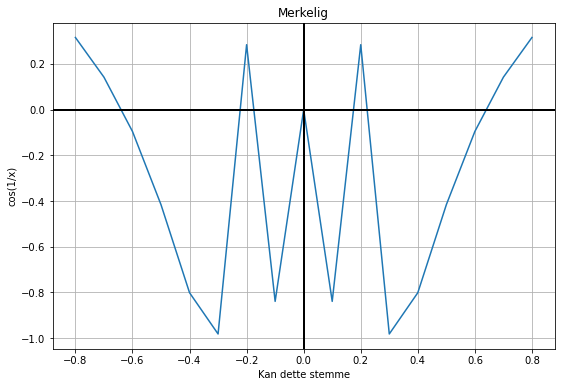

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6] # Dette er for å få en større figur

maksx = float(input('Maksimal x-verdi (mellom 0 og 1 er passelig): '))
plottpunkter = int(input('Antall punkter i plottet: '))

x = np.linspace(-maksx, maksx, plottpunkter)
y = np.zeros(plottpunkter) # y blir like stor som x og fyllt med 0
i = 0  # indeks i array
for x_verdi in x:  # tar hver enkelt verdi i x
    if x_verdi != 0:
        y[i] = np.cos(1/x_verdi)
    else:
        y[i] = 0
    i += 1  # Teller videre på indeks
plt.plot (x, y)
plt.grid()
plt.axhline(c='k', lw=2) # uthever x-aksen
plt.axvline(c='k', lw=2) # uthever y-aksen
plt.title('Merkelig')
plt.xlabel('Kan dette stemme')
plt.ylabel('cos(1/x)')
plt.show()

Som alternativ til forløkke kan vi også bruke pyton sin mulighet til å jobbe med deler av en array basert på betingelser.  Vi kan si at vi skal jobbe med den delen av arrayen der verdiene er mindre/større en en verdi. I dete tilfelle ```x[x<0]``` og ```x[x>0]```.

Maksimal x-verdi (mellom 0 og 1 er passelig):  .8
Antall punkter i plottet:  77


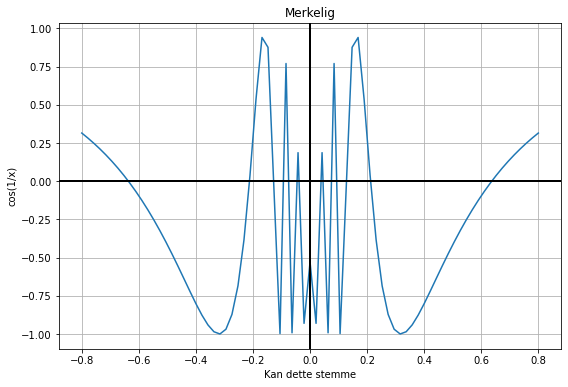

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6] # Dette er for å få en større figur

maksx = float(input('Maksimal x-verdi (mellom 0 og 1 er passelig): '))
plottpunkter = int(input('Antall punkter i plottet: '))

x = np.linspace(-maksx, maksx, plottpunkter)
y = np.zeros(plottpunkter) # y blir like stor som x og fyllt med 0
y[x<0] = np.cos(1/x[x<0]) 
y[x==0] = 0
y[x>0] = np.cos(1/x[x>0])

plt.plot (x, y)
plt.grid()
plt.axhline(c='k', lw=2) # uthever x-aksen
plt.axvline(c='k', lw=2) # uthever y-aksen
plt.title('Merkelig')
plt.xlabel('Kan dette stemme')
plt.ylabel('cos(1/x)')
plt.show()

Det kan være litt vanskelig å tro, men det er altså samme funksjon som er plottet i eksemplene. Og enda vil den forandre seg (bli riktigere) om man øker antall punkter.